# Flight Status Predictor

**What problem are we trying to solve?**

The goal of this project is to develop and deploy an ML model in which an end user can specify a set of features describing a commercial flight of interest and receive a categorical (yes or no) output indicating if that flight will be delayed more than fifteen minutes or not. 

**Answer these questions about the data:**

- What variables contribute to a flight being delayed or not?
- Are there any variables that might hinder the analysis?
- Is there imbalance or bias in the dataset that could make the data lean more towards one way than another? 

---

# Data Preprocessing (Data Cleaning and Preparation)

<span style="color:red">**NOTE**</span>: This step was mostly taken care of, but wanted to still view the data and make any necessary adjustments

**Cleaning and Formatting**

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Store CSV file in variable 
flights = r'..\data\Flight_On_Time_Data.csv'
# Read CSV file in pandas dataframe 
df = pd.read_csv(flights)

In [5]:
# Print dataframe to confirm successful loading
df

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,...,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
0,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N851UA,1788,...,219,162,1,1372,6,NaN,NaN,NaN,NaN,NaN
1,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37530,1787,...,93,65,1,472,2,39.0,0.0,8.0,0.0,0.0
2,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N78509,1786,...,271,249,1,2052,9,NaN,NaN,NaN,NaN,NaN
3,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N47280,1785,...,87,69,1,413,2,NaN,NaN,NaN,NaN,NaN
4,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N826UA,1784,...,160,129,1,1024,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N236JQ,5646,...,100,75,1,399,2,NaN,NaN,NaN,NaN,NaN
6777974,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N236JQ,5646,...,87,67,1,399,2,NaN,NaN,NaN,NaN,NaN
6777975,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N212JQ,5647,...,136,110,1,752,4,NaN,NaN,NaN,NaN,NaN
6777976,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N212JQ,5647,...,128,107,1,752,4,NaN,NaN,NaN,NaN,NaN


**Check for correct dtypes**

In [7]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 43 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Carrier_Name                    object 
 1   Year                            int64  
 2   Quarter                         int64  
 3   Month                           object 
 4   Month_Day                       int64  
 5   Week_Day                        object 
 6   Flight_Date                     object 
 7   Airline_DOT_ID                  int64  
 8   Tail_Number                     object 
 9   Flight_Number                   int64  
 10  Origin_Airport_ID               int64  
 11  Origin_City_Market_ID           int64  
 12  Origin_IATA_Code                object 
 13  Origin_City_State               object 
 14  Destination_Airport_ID          int64  
 15  Destination_City_Market_ID      int64  
 16  Destination_IATA_Code           object 
 17  Destination_City_State     

dtypes are already taken care of. It does not look like we need to do any other conversions. 

Let us move on to checking for **NULL** and **Duplicate** values 

In [9]:
# Check for missing values 
print(df.isnull().sum())

Carrier_Name                            0
Year                                    0
Quarter                                 0
Month                                   0
Month_Day                               0
Week_Day                                0
Flight_Date                             0
Airline_DOT_ID                          0
Tail_Number                             0
Flight_Number                           0
Origin_Airport_ID                       0
Origin_City_Market_ID                   0
Origin_IATA_Code                        0
Origin_City_State                       0
Destination_Airport_ID                  0
Destination_City_Market_ID              0
Destination_IATA_Code                   0
Destination_City_State                  0
Dep_Time_Block_Group                    0
Scheduled_Departure_Time                0
Actual_Dep_Time                         0
Dep_Time_Offset                         0
Dep_Delay_Minutes                       0
Dep_Delay_At_Least_15_Minutes     

In [11]:
# Check for duplicate entries
df[df.duplicated()]

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,...,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay


- There doesn't appear to be any duplicate rows
- There are a lot of NULL values in the following columns: Carrier_Delay, Weather_Delay, National_Aviation_System_Delay, Security_Delay, and Late_Aircraft_Delay
- The data cleaning process was mostly done but these columns left NULL values. <span style="color:red">*Why?*</span>

We now want to remove some variables from the dataframe that deals with the actual delay of the flight 
- This will get rid of any biases and imbalance to our data

In [13]:
# Will have information leakage from the following columns
df.drop(['Actual_Dep_Time','Dep_Time_Offset','Dep_Delay_Minutes','Actual_Arr_Time','Arr_Time_Offset',
         'Arr_Delay_Minutes','Arr_Delay_At_Least_15_Minutes','Actual_Gate_to_Gate_Time','Carrier_Delay',
         'Weather_Delay','National_Aviation_System_Delay','Security_Delay','Late_Aircraft_Delay',
         'Actual_Gate_to_Gate_Time','Time_Airborne'], axis=1, inplace=True)

# Already have the date column so no need for this
df.drop(['Quarter','Year','Month', 'Month_Day'], axis=1, inplace=True)

print("Columns remaining: ", df.shape[1])

Columns remaining:  25


In [15]:
df.rename(columns={'Dep_Delay_At_Least_15_Minutes':'delayed'}, inplace=True)

In [17]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Airline_DOT_ID',
       'Tail_Number', 'Flight_Number', 'Origin_Airport_ID',
       'Origin_City_Market_ID', 'Origin_IATA_Code', 'Origin_City_State',
       'Destination_Airport_ID', 'Destination_City_Market_ID',
       'Destination_IATA_Code', 'Destination_City_State',
       'Dep_Time_Block_Group', 'Scheduled_Departure_Time', 'delayed',
       'Scheduled_Arrival_Time', 'Arr_Time_Block_Group', 'Flight_Cancelled',
       'Flight_Diverted', 'Scheduled_Gate_to_Gate_Time', 'Number_of_Flights',
       'Distance_Miles', 'Distance_Group'],
      dtype='object')

In [19]:
# Set options to view all columns instead of truncating columns
pd.set_option('display.max_columns', None)

# View all data again after dropping so many 
df

,Carrier_Name,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,delayed,Scheduled_Arrival_Time,Arr_Time_Block_Group,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Number_of_Flights,Distance_Miles,Distance_Group
0,United Air Lines Inc.,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",11618,31703,EWR,"Newark, NJ",Evening,1926,0,2359,Night,0,0,213,1,1372,6
1,United Air Lines Inc.,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",13871,33316,OMA,"Omaha, NE",Evening,2051,1,2316,Night,0,0,85,1,472,2
2,United Air Lines Inc.,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",11042,30647,CLE,"Cleveland, OH",Night,2328,0,701,Early Morning,0,0,273,1,2052,9
3,United Air Lines Inc.,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",12264,30852,IAD,"Washington, DC",Early Morning,600,0,735,Early Morning,0,0,95,1,413,2
4,United Air Lines Inc.,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",11292,30325,DEN,"Denver, CO",Morning,1116,0,1459,Early Afternoon,0,0,163,1,1024,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,10721,30721,BOS,"Boston, MA",11278,30852,DCA,"Washington, DC",Early Afternoon,1315,0,1507,Afternoon,0,0,112,1,399,2
6777974,Republic Airline,Friday,2024-03-29,20452,N236JQ,5646,11278,30852,DCA,"Washington, DC",10721,30721,BOS,"Boston, MA",Afternoon,1620,0,1802,Evening,0,0,102,1,399,2
6777975,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,10721,30721,BOS,"Boston, MA",11193,33105,CVG,"Cincinnati, OH",Early Afternoon,1425,0,1659,Afternoon,0,0,154,1,752,4
6777976,Republic Airline,Friday,2024-03-29,20452,N212JQ,5647,11193,33105,CVG,"Cincinnati, OH",10721,30721,BOS,"Boston, MA",Afternoon,1751,0,1958,Evening,0,0,127,1,752,4


---

# Exploratory Data Analysis (EDA)

# Basic Statistics

How many flights were delayed? 

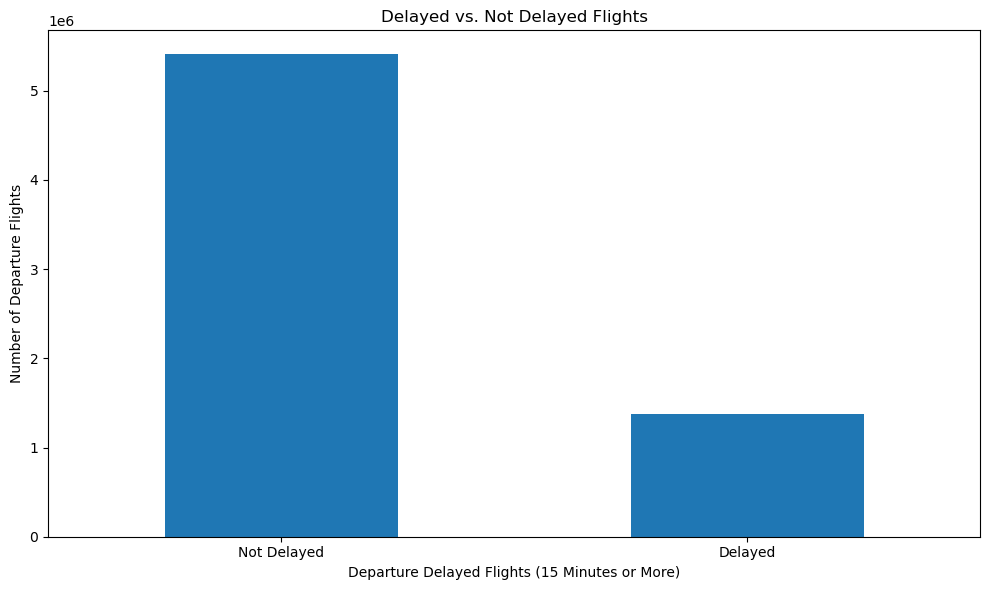

delayed
0    79.748887
1    20.251113
Name: count, dtype: float64


In [21]:
# Count the occurrences of flight delays
delayed_counts = df['delayed'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
delayed_counts.plot(kind='bar')
plt.xlabel('Departure Delayed Flights (15 Minutes or More)')
plt.ylabel('Number of Departure Flights')
plt.title('Delayed vs. Not Delayed Flights')
plt.xticks(ticks=[0, 1], rotation=0, labels=['Not Delayed', 'Delayed'], ha='center')  # Rotate x-axis labels for better visibility and define labels 
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

print((df['delayed'].value_counts()/df.shape[0]) * 100)

**About <span style="color:red">20%</span> of flights were delayed**

What kind of distribution do we have for airlines? 
- Does it matter which airline you choose that causes the delayed flights? 

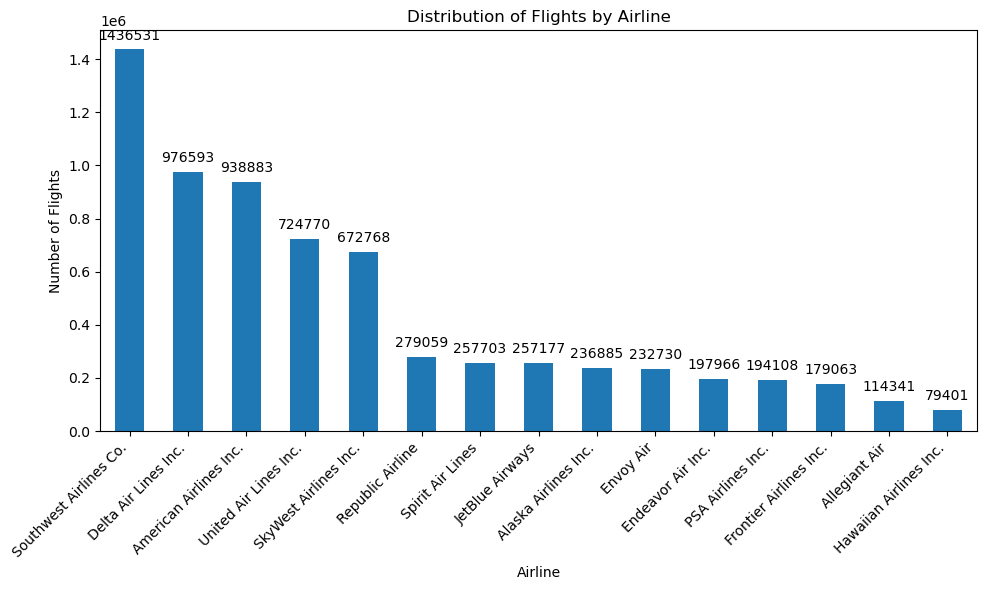

In [45]:
# Count the occurrences of each airline
airline_counts = df['Carrier_Name'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
ax = airline_counts.plot(kind='bar')

# Add text annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flights by Airline')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<Figure size 1000x600 with 0 Axes>

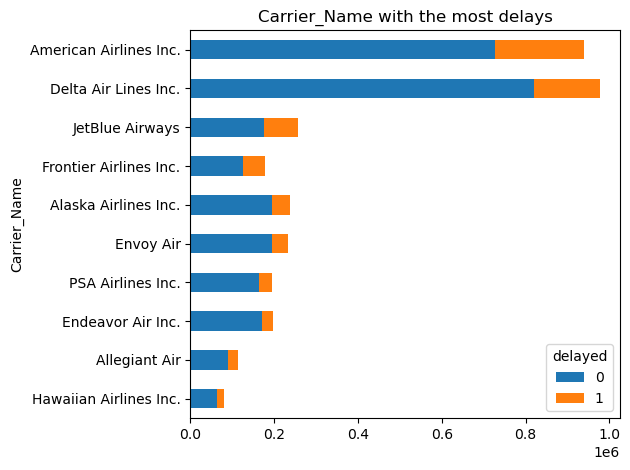

In [119]:
cols = ['Carrier_Name']

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

for i, col in enumerate(cols): 
    try:
        # Try to plot on current subplot
        df.groupby([col, 'delayed']).size().unstack().head(10).sort_values(by=1).plot(kind='barh', stacked=True)
        plt.title(f'{col} with the most delays')
    except IndexError:
        # If all subplots are used, break the loop
        break
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**American Airlines** and **Delta Air Lines Inc.** have the most delayed flights out of the top 10 carriers. 

We will still investigate all top 10 carriers with the most delays, but keep in mind these 2 carriers for now

Let us see which locations are responsible for the most delays in the top 10 carriers

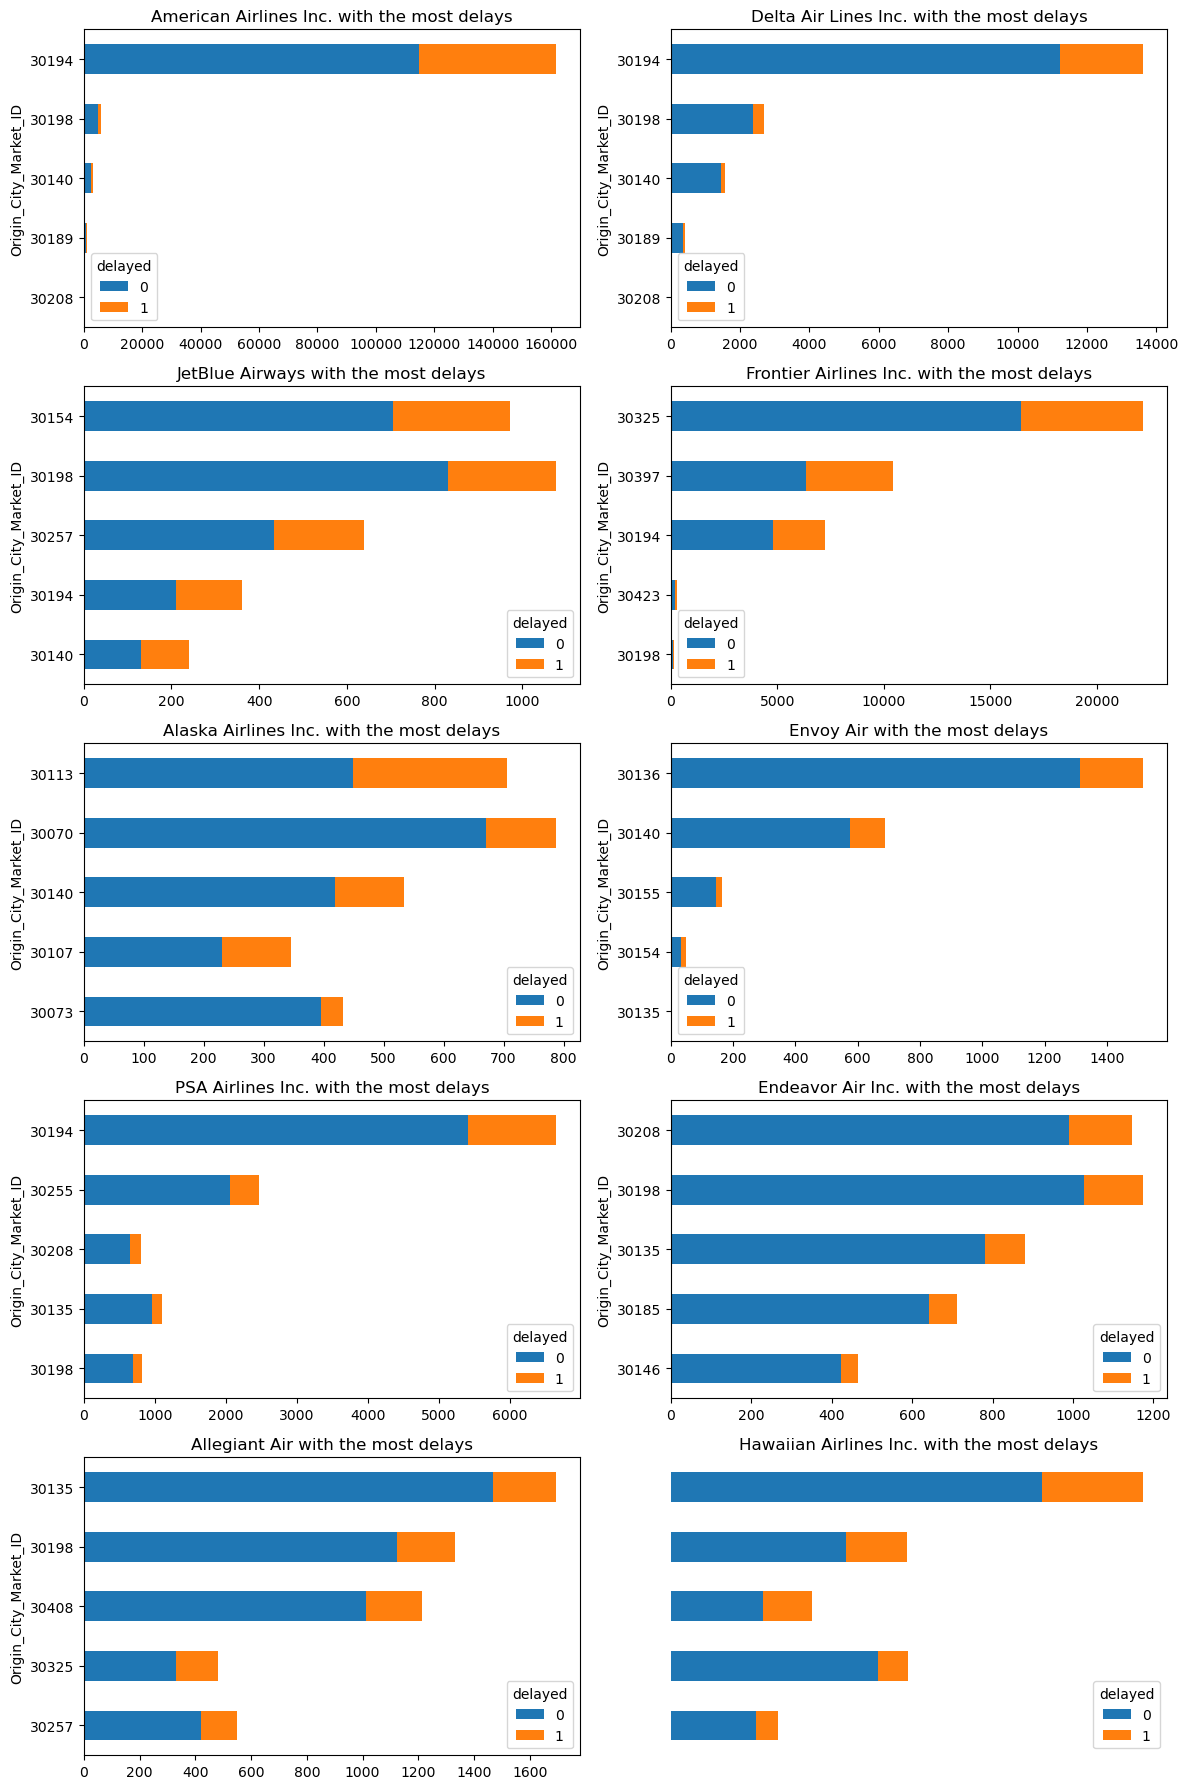

In [127]:
carrier_name = ['American Airlines Inc.', 'Delta Air Lines Inc.', 'JetBlue Airways', 'Frontier Airlines Inc.', 
                'Alaska Airlines Inc.', 'Envoy Air', 'PSA Airlines Inc.', 'Endeavor Air Inc.', 'Allegiant Air', 
                'Hawaiian Airlines Inc.']

fig, axes = plt.subplots(nrows=int((len(carrier_name) - 1) / 2) + 1, ncols=2, figsize=(12, 18))

# Flatten axes in case there's only one row
axes = axes.ravel()

for i, carrier in enumerate(carrier_name):
    try:
        # Try to plot on current subplot
        df[df['Carrier_Name'] == carrier].groupby(['Origin_City_Market_ID', 'delayed']).size().unstack().head(5).sort_values(by=1).plot(kind='barh', stacked=True, ax=axes[i])
        axes[i].set_title(f'{carrier} with the most delays')
    except IndexError:
        # If all subplots are used, break the loop
        break

# Make sure any unused axes don't have titles or labels
for ax in axes[i:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Encode categorical variables

In [37]:
# Inspect the data types of each column 
print(df.dtypes)

Carrier_Name                       object
Year                                int64
Quarter                             int64
Month                              object
Month_Day                           int64
Week_Day                           object
Flight_Date                        object
Airline_DOT_ID                      int64
Tail_Number                        object
Flight_Number                       int64
Origin_Airport_ID                   int64
Origin_City_Market_ID               int64
Origin_IATA_Code                   object
Origin_City_State                  object
Destination_Airport_ID              int64
Destination_City_Market_ID          int64
Destination_IATA_Code              object
Destination_City_State             object
Dep_Time_Block_Group               object
Scheduled_Departure_Time            int64
Actual_Dep_Time                     int64
Dep_Time_Offset                     int64
Dep_Delay_Minutes                   int64
Dep_Delay_At_Least_15_Minutes     

In [46]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Count unique values in each categorical column 
unique_counts = df[categorical_columns].nunique()
unique_counts

Carrier_Name                15
Month                       12
Week_Day                     7
Flight_Date                366
Tail_Number               5969
Origin_IATA_Code           348
Origin_City_State          342
Destination_IATA_Code      348
Destination_City_State     342
Dep_Time_Block_Group         6
Arr_Time_Block_Group         6
dtype: int64

In [48]:
# Check unique values in categorical columns
for col in categorical_columns:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in Carrier_Name: ['United Air Lines Inc.' 'Spirit Air Lines' 'Southwest Airlines Co.'
 'SkyWest Airlines Inc.' 'Delta Air Lines Inc.' 'Republic Airline'
 'Frontier Airlines Inc.' 'Alaska Airlines Inc.' 'JetBlue Airways'
 'Hawaiian Airlines Inc.' 'Allegiant Air' 'American Airlines Inc.'
 'Envoy Air' 'Endeavor Air Inc.' 'PSA Airlines Inc.']
Unique values in Month: ['Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb' 'Mar']
Unique values in Week_Day: ['Wednesday' 'Tuesday' 'Monday' 'Sunday' 'Saturday' 'Friday' 'Thursday']
Unique values in Flight_Date: ['2023-04-26' '2023-04-25' '2023-04-24' '2023-04-23' '2023-04-16'
 '2023-04-15' '2023-04-14' '2023-04-13' '2023-04-02' '2023-04-01'
 '2023-04-30' '2023-04-29' '2023-04-28' '2023-04-27' '2023-04-12'
 '2023-04-11' '2023-04-10' '2023-04-09' '2023-04-22' '2023-04-21'
 '2023-04-20' '2023-04-08' '2023-04-07' '2023-04-06' '2023-04-19'
 '2023-04-18' '2023-04-17' '2023-04-05' '2023-04-04' '2023-04-03'
 '2023-05-14' '2023-0

In [50]:
# Import library for One-Hot Encoding 
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder instance
encoder = OneHotEncoder(handle_unknown='ignore')

In [53]:
# Check for NaN values in data again
nan_columns = df.columns[df.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['Carrier_Delay', 'Weather_Delay', 'National_Aviation_System_Delay', 'Security_Delay', 'Late_Aircraft_Delay']


In [57]:
# Review NaN values 
print('Nan in Carrier_Delay column')
df[df.Carrier_Delay.isna()]

Nan in Carrier_Delay column


,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,...,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
0,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N851UA,1788,...,219,162,1,1372,6,NaN,NaN,NaN,NaN,NaN
2,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N78509,1786,...,271,249,1,2052,9,NaN,NaN,NaN,NaN,NaN
3,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N47280,1785,...,87,69,1,413,2,NaN,NaN,NaN,NaN,NaN
4,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N826UA,1784,...,160,129,1,1024,5,NaN,NaN,NaN,NaN,NaN
6,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N77430,1782,...,118,100,1,649,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6777973,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N236JQ,5646,...,100,75,1,399,2,NaN,NaN,NaN,NaN,NaN
6777974,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N236JQ,5646,...,87,67,1,399,2,NaN,NaN,NaN,NaN,NaN
6777975,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N212JQ,5647,...,136,110,1,752,4,NaN,NaN,NaN,NaN,NaN
6777976,Republic Airline,2024,1,Mar,29,Friday,2024-03-29,20452,N212JQ,5647,...,128,107,1,752,4,NaN,NaN,NaN,NaN,NaN
